In [ ]:
---AACHAL RAJESH JAISWAL--- 
DATA SCIENCE INTERN 
TASK 2 ----- STOCK PREDICTION DATA SET="titanic.csv"


In [2]:
import numpy as np
import math


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data=pd.read_csv('titanic.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
data.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.shape

(891, 12)

In [9]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [10]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [11]:
data['Age'].isnull().sum()
data['Embarked'].isnull().sum()
data['Cabin'].isnull().sum()
data= data.dropna(subset=['Age'])
data= data.dropna(subset=['Embarked'])
data= data.dropna(subset=['Cabin'])
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [12]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [13]:
data.duplicated().sum()

0

In [14]:
for i in data.columns:
    print(i)
    print(data[i].unique())

PassengerId
[  2   4   7  11  12  22  24  28  53  55  63  67  76  89  93  97  98 103
 111 119 124 125 137 138 140 149 152 171 175 178 184 194 195 196 206 210
 216 219 225 231 246 249 252 253 258 263 264 269 270 274 276 292 293 298
 300 306 308 310 311 312 319 320 326 328 330 332 333 337 338 340 341 342
 346 357 367 370 371 378 391 394 395 413 430 431 435 436 439 446 450 453
 454 457 461 463 474 485 487 488 493 497 499 505 506 513 516 517 521 524
 537 540 541 545 551 557 559 572 573 578 582 584 586 588 592 600 610 619
 622 626 628 631 633 642 646 648 660 663 672 680 682 690 691 699 700 701
 702 708 711 713 716 717 718 725 731 738 742 743 746 749 752 760 764 766
 773 780 782 783 790 797 803 807 810 821 824 836 854 858 863 868 872 873
 880 888 890]
Survived
[1 0]
Pclass
[1 3 2]
Name
['Cumings, Mrs. John Bradley (Florence Briggs Thayer)'
 'Futrelle, Mrs. Jacques Heath (Lily May Peel)' 'McCarthy, Mr. Timothy J'
 'Sandstrom, Miss. Marguerite Rut' 'Bonnell, Miss. Elizabeth'
 'Beesley, Mr. Law

In [15]:
data['PassengerId'].unique()

array([  2,   4,   7,  11,  12,  22,  24,  28,  53,  55,  63,  67,  76,
        89,  93,  97,  98, 103, 111, 119, 124, 125, 137, 138, 140, 149,
       152, 171, 175, 178, 184, 194, 195, 196, 206, 210, 216, 219, 225,
       231, 246, 249, 252, 253, 258, 263, 264, 269, 270, 274, 276, 292,
       293, 298, 300, 306, 308, 310, 311, 312, 319, 320, 326, 328, 330,
       332, 333, 337, 338, 340, 341, 342, 346, 357, 367, 370, 371, 378,
       391, 394, 395, 413, 430, 431, 435, 436, 439, 446, 450, 453, 454,
       457, 461, 463, 474, 485, 487, 488, 493, 497, 499, 505, 506, 513,
       516, 517, 521, 524, 537, 540, 541, 545, 551, 557, 559, 572, 573,
       578, 582, 584, 586, 588, 592, 600, 610, 619, 622, 626, 628, 631,
       633, 642, 646, 648, 660, 663, 672, 680, 682, 690, 691, 699, 700,
       701, 702, 708, 711, 713, 716, 717, 718, 725, 731, 738, 742, 743,
       746, 749, 752, 760, 764, 766, 773, 780, 782, 783, 790, 797, 803,
       807, 810, 821, 824, 836, 854, 858, 863, 868, 872, 873, 88

In [16]:
data['Survived'].unique()

array([1, 0], dtype=int64)

In [17]:
data['Pclass'].unique()

array([1, 3, 2], dtype=int64)

In [18]:
data['Age'].unique()

array([38.  , 35.  , 54.  ,  4.  , 58.  , 34.  , 28.  , 19.  , 49.  ,
       65.  , 45.  , 29.  , 25.  , 23.  , 46.  , 71.  , 21.  , 47.  ,
       24.  , 32.5 , 37.  , 36.5 , 22.  , 61.  , 56.  , 50.  ,  1.  ,
        3.  , 44.  ,  2.  , 40.  , 31.  , 32.  , 62.  , 30.  , 52.  ,
       63.  , 36.  ,  0.92, 17.  , 18.  , 16.  , 45.5 , 41.  , 60.  ,
       27.  , 33.  , 14.  , 64.  , 48.  , 55.  , 39.  , 53.  , 42.  ,
       80.  , 15.  , 70.  ,  6.  , 51.  , 57.  , 43.  , 11.  , 26.  ])

In [19]:
data['SibSp'].unique()

array([1, 0, 3, 2], dtype=int64)

In [20]:
data['Parch'].unique()

array([0, 1, 2, 4], dtype=int64)

In [21]:
data['Fare'].unique()

array([ 71.2833,  53.1   ,  51.8625,  16.7   ,  26.55  ,  13.    ,
        35.5   , 263.    ,  76.7292,  61.9792,  83.475 ,  10.5   ,
         7.65  ,  61.175 ,  34.6542,  63.3583,  77.2875,  52.    ,
       247.5208,  26.2833,  79.2   ,  26.    ,  66.6   ,  33.5   ,
        30.6958,  28.7125,  39.    ,  27.7208, 146.5208,  10.4625,
        31.    , 113.275 ,  76.2917,  90.    ,  52.5542,  86.5   ,
        79.65  ,   0.    , 153.4625, 135.6333,  29.7   ,  77.9583,
        91.0792,  12.875 , 151.55  , 108.9   ,  56.9292,  83.1583,
       262.375 , 164.8667, 134.5   ,  57.9792,  28.5   ,  55.    ,
        75.25  ,  69.3   ,  55.4417, 211.5   , 120.    ,   8.05  ,
        55.9   ,  81.8583,  30.5   ,  27.75  ,  89.1042,  38.5   ,
        13.7917,  78.2667,  26.2875,  34.0208,  93.5   ,  49.5   ,
        71.    , 106.425 , 110.8833,  39.6   ,  51.4792,  26.3875,
        40.125 ,  32.3208,  30.    ,  25.5875, 512.3292, 211.3375,
        57.    , 227.525 ,  49.5042,  78.85  ,  12.475 ,  25.9

In [22]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [23]:
data.duplicated()

1      False
3      False
6      False
10     False
11     False
       ...  
871    False
872    False
879    False
887    False
889    False
Length: 183, dtype: bool

In [24]:
data.duplicated().sum()

0

In [25]:
data.nunique()

PassengerId    183
Survived         2
Pclass           3
Name           183
Sex              2
Age             63
SibSp            4
Parch            4
Ticket         127
Fare            93
Cabin          133
Embarked         3
dtype: int64

In [26]:
data['PassengerId'].value_counts()

2      1
572    1
578    1
582    1
584    1
      ..
328    1
330    1
332    1
333    1
890    1
Name: PassengerId, Length: 183, dtype: int64

In [27]:
data['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

In [28]:
data['Pclass'].value_counts()

1    158
2     15
3     10
Name: Pclass, dtype: int64

In [29]:
data['Name'].value_counts()

Cumings, Mrs. John Bradley (Florence Briggs Thayer)     1
Appleton, Mrs. Edward Dale (Charlotte Lamson)           1
Silvey, Mrs. William Baird (Alice Munger)               1
Thayer, Mrs. John Borland (Marian Longstreth Morris)    1
Ross, Mr. John Hugo                                     1
                                                       ..
Ball, Mrs. (Ada E Hall)                                 1
Hippach, Miss. Jean Gertrude                            1
Partner, Mr. Austen                                     1
Graham, Mr. George Edward                               1
Behr, Mr. Karl Howell                                   1
Name: Name, Length: 183, dtype: int64

In [30]:
data['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

In [31]:
data['Age'].value_counts()

36.0    11
24.0     9
19.0     6
35.0     6
31.0     5
        ..
71.0     1
3.0      1
1.0      1
36.5     1
26.0     1
Name: Age, Length: 63, dtype: int64

In [32]:
data['SibSp'].value_counts()

0    110
1     64
2      6
3      3
Name: SibSp, dtype: int64

In [33]:
data['Parch'].value_counts()

0    122
1     37
2     23
4      1
Name: Parch, dtype: int64

In [34]:
data['Fare'].value_counts()

26.5500     7
53.1000     5
90.0000     4
10.5000     4
13.0000     4
           ..
211.5000    1
8.0500      1
81.8583     1
27.7500     1
5.0000      1
Name: Fare, Length: 93, dtype: int64

<AxesSubplot:>

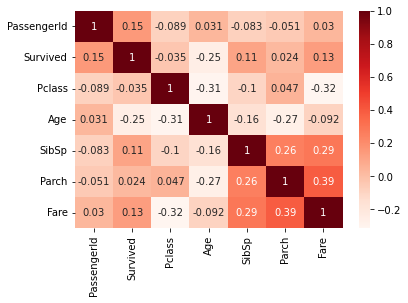

In [35]:
corr=data.corr()
sns.heatmap(corr,annot=True,cmap='Reds')

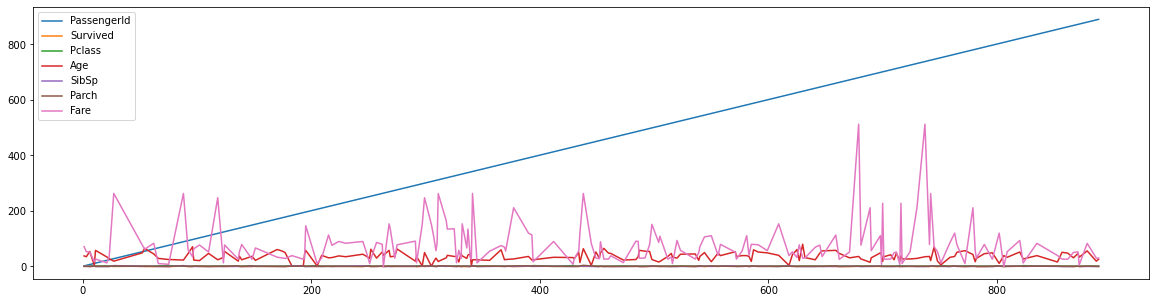

In [36]:
data.plot(figsize=(20,5))
plt.show()

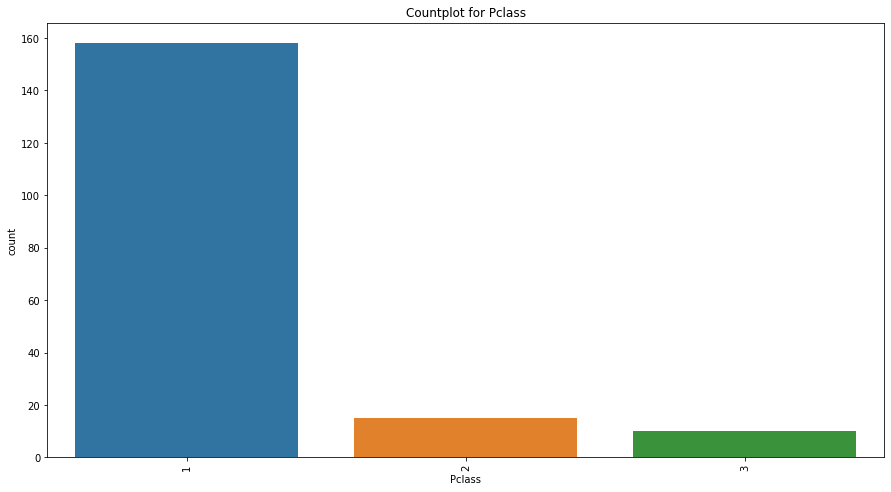

In [37]:
plt.figure(figsize=(15,8))
sns.countplot(x='Pclass',data = data)
plt.xticks(rotation =90)
plt.title('Countplot for Pclass')             
plt.show()

(array([0, 1]), [Text(0, 0, 'female'), Text(1, 0, 'male')])

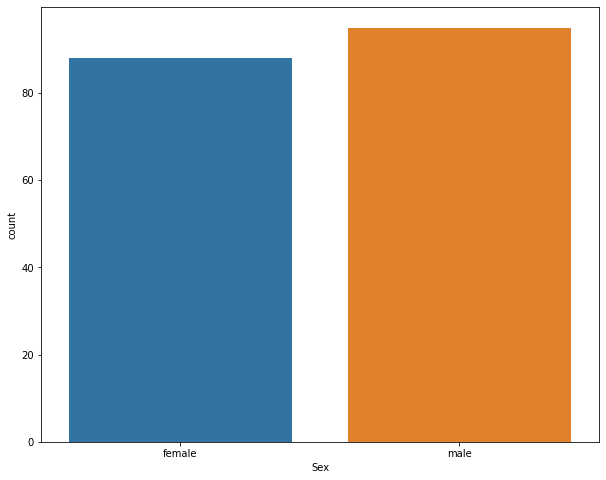

In [38]:
plt.rcParams['figure.figsize'] = (10,8)
sns.countplot(x=data['Sex'])
plt.xticks(rotation =0)

C:\Users\Admin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


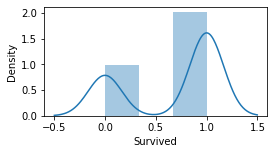

In [44]:
from matplotlib import rcParams
# figure size in inches
rcParams['figure.figsize'] = 4,2

sns.distplot(data['Survived'])
plt.show()


In [47]:
data_set = data.filter(['Survived'])
dataset = data.values
training_data_len=math.ceil(len(data) * 8)
training_data_len

1464

In [48]:
dataset

array([[2, nan, 1, ..., 71.2833, 'C85', 'C'],
       [4, nan, 1, ..., 53.1, 'C123', 'S'],
       [7, nan, 1, ..., 51.8625, 'E46', 'S'],
       ...,
       [880, 0.7, 1, ..., 83.1583, 'C50', 'C'],
       [888, 0.7, 1, ..., 30.0, 'B42', 'S'],
       [890, 0.7, 1, ..., 30.0, 'C148', 'C']], dtype=object)

In [49]:
data = data.iloc[:, 0:5]
data


,PassengerId,Survived,Pclass,Name,Sex
1,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
3,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
6,7,NaN,1,"McCarthy, Mr. Timothy J",male
10,11,NaN,3,"Sandstrom, Miss. Marguerite Rut",female
11,12,NaN,1,"Bonnell, Miss. Elizabeth",female
...,...,...,...,...,...
871,872,0.733333,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female
872,873,0.700000,1,"Carlsson, Mr. Frans Olof",male
879,880,0.700000,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female
887,888,0.700000,1,"Graham, Miss. Margaret Edith",female


In [50]:
training_set = data.iloc[:, 1:2].values
training_set


array([[       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [       nan],
       [0.43333333],
       [0.43333333],
       [0.43333333],
       [0.46666667],
       [0.46666667],
       [0.43333333],
       [0.43333333],
       [0.43333333],
       [0.46666667],
       [0.46666667],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.5       ],
       [0.46666667],
       [0.5       ],
       [0.5       ],
       [0.46666667],
       [0.5  

In [51]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0, 1))
data_training_scaled = scaler.fit_transform(training_set)


In [55]:
features_set = []
labels = []
for i in range(60, 586):
  features_set.append(data_training_scaled[i - 60:i, 0])

In [56]:
features_set, labels = np.array(features_set), np.array(labels)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6256\4245798851.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  features_set, labels = np.array(features_set), np.array(labels)


In [58]:
features_set = np.reshape(features_set, (features_set.shape[0], 1))
features_set.shape

(526, 1)

In [59]:
!pip install tensorflow

In [60]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM


In [61]:
model = Sequential()

In [62]:
model.compile(optimizer='adam', loss='mean_squared_error')


In [67]:
data_total = pd.concat((data['Survived'], data['Survived']), axis=0)

In [68]:
test_inputs = data_total[len(data_total) - len(data) - 60:].values
test_inputs.shape


(243,)

In [69]:
test_inputs = test_inputs.reshape(-1, 1)
test_inputs = scaler.transform(test_inputs)

In [70]:
test_feature = []
for i in range(60, 89):
  test_feature.append(test_inputs[i-60:i, 0])


In [71]:
test_feature = np.array(test_feature)
test_feature = np.reshape(test_feature, (test_feature.shape[0] - test_feature.shape[1], 1))
test_feature.shape


(1740, 1)

In [72]:
classification = model.predict(test_feature)

In [73]:
classification

array([[0.75],
       [0.75],
       [0.75],
       ...,
       [ nan],
       [ nan],
       [ nan]], dtype=float32)

In [74]:
x_train = data[0:1256]
y_train = data[1:1257]
print(x_train.shape)
print(y_train.shape)

(183, 5)
(182, 5)


In [75]:
x_train

,PassengerId,Survived,Pclass,Name,Sex
1,2,NaN,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female
3,4,NaN,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female
6,7,NaN,1,"McCarthy, Mr. Timothy J",male
10,11,NaN,3,"Sandstrom, Miss. Marguerite Rut",female
11,12,NaN,1,"Bonnell, Miss. Elizabeth",female
...,...,...,...,...,...
871,872,0.733333,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female
872,873,0.700000,1,"Carlsson, Mr. Frans Olof",male
879,880,0.700000,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female
887,888,0.700000,1,"Graham, Miss. Margaret Edith",female


In [76]:
np.random.normal(1)

2.9765919947103443

In [77]:
np.random.normal(5)

4.60059780821406

In [78]:
np.random.seed(42)

In [79]:
np.random.normal(size=1000, scale=100).std()

97.87262077473541